In [5]:
# GET DATA
import pandas as pd

messages = pd.read_csv('SMSSpamCollection.csv', sep='\t', names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:ylabel='Frequency'>

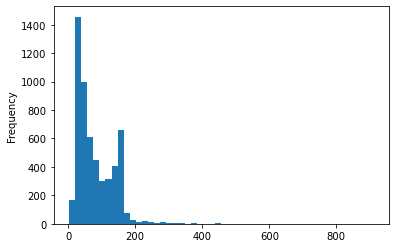

In [19]:
# DATA VISUALIZATION
messages['length'] = messages['message'].apply(len)
messages['length'].plot(bins=50, kind='hist')

In [12]:
# Text Pre-processing
import string
print("Punctuations: ")
print(string.punctuation)
print("-----------------------------------------------------")

from nltk.corpus import stopwords
print("Stop words: ")
stopwords.words('english')[0:10]

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


messages['message'].head(5).apply(text_process)

Punctuations: 
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
-----------------------------------------------------
Stop words: 


0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [23]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

messages_bow = bow_transformer.transform(messages['message'])

print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [24]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print('Shape of Sparse Matrix: ', messages_tfidf.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [26]:
# Training a model
from sklearn.model_selection import train_test_split
X = messages_tfidf
y = messages['label']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [30]:
# Naive_bayes
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

MultinomialNB()

In [31]:
# SVM
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [37]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [33]:
# Model Evaluation
NB_prediction = NB_model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,NB_prediction))
print('\n')
print(classification_report(y_test,NB_prediction))

[[1475    0]
 [  71  126]]


              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1475
        spam       1.00      0.64      0.78       197

    accuracy                           0.96      1672
   macro avg       0.98      0.82      0.88      1672
weighted avg       0.96      0.96      0.95      1672



In [34]:
# Model Evaluation
svc_prediction = svc_model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,svc_prediction))
print('\n')
print(classification_report(y_test,svc_prediction))

[[1475    0]
 [  59  138]]


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1475
        spam       1.00      0.70      0.82       197

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.97      0.96      0.96      1672



In [36]:
# Model Evaluation
log_prediction = log_model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,log_prediction))
print('\n')
print(classification_report(y_test,log_prediction))

[[1474    1]
 [ 103   94]]


              precision    recall  f1-score   support

         ham       0.93      1.00      0.97      1475
        spam       0.99      0.48      0.64       197

    accuracy                           0.94      1672
   macro avg       0.96      0.74      0.80      1672
weighted avg       0.94      0.94      0.93      1672



In [38]:
# Model Evaluation
rfc_prediction = rfc.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,rfc_prediction))
print('\n')
print(classification_report(y_test,rfc_prediction))

[[1472    3]
 [  41  156]]


              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1475
        spam       0.98      0.79      0.88       197

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672

